In [1]:
# Importing dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns

In [2]:
# Importing the input dataset
heart_df = pd.read_csv('Resources/heart_dummies.csv')
print(heart_df.shape)
heart_df.head()

(319795, 54)


,HeartDisease,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,3,30,5,0,1,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
1,0,0,0,7,1,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,1
2,0,20,30,8,0,1,1,0,1,0,...,1,0,0,1,0,0,1,0,0,0
3,0,0,0,6,1,0,1,0,1,0,...,1,1,0,0,0,0,0,1,0,0
4,0,28,0,8,1,0,1,0,1,0,...,1,1,0,0,0,0,0,0,0,1


In [3]:
heart_df.columns

Index(['HeartDisease', 'PhysicalHealth', 'MentalHealth', 'SleepTime',
       'Smoking_No', 'Smoking_Yes', 'AlcoholDrinking_No',
       'AlcoholDrinking_Yes', 'Stroke_No', 'Stroke_Yes', 'DiffWalking_No',
       'DiffWalking_Yes', 'Sex_Female', 'Sex_Male', 'PhysicalActivity_No',
       'PhysicalActivity_Yes', 'Asthma_No', 'Asthma_Yes', 'KidneyDisease_No',
       'KidneyDisease_Yes', 'SkinCancer_No', 'SkinCancer_Yes',
       'BMI_Healthy_Weight', 'BMI_Obesity', 'BMI_Overweight',
       'BMI_Underweight', 'AgeCategory_18-24', 'AgeCategory_25-29',
       'AgeCategory_30-34', 'AgeCategory_35-39', 'AgeCategory_40-44',
       'AgeCategory_45-49', 'AgeCategory_50-54', 'AgeCategory_55-59',
       'AgeCategory_60-64', 'AgeCategory_65-69', 'AgeCategory_70-74',
       'AgeCategory_75-79', 'AgeCategory_80 or older',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'Diabetic_No',
       'Diabetic_No, borderline diabetes', 'D

### Split our data into training and testing

In [4]:
# Removing HeartDisease target from features data
y = heart_df.loc[:,"HeartDisease"]
X = heart_df.drop(columns="HeartDisease")

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(239846, 53)
(79949, 53)
(239846,)
(79949,)


In [6]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(239846, 53)
(79949, 53)


### Create a Logistic Regression Model

In [7]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', max_iter=500000, random_state=1)
model

LogisticRegression(max_iter=500000, random_state=1)

### Fit (train) or model using the training data

In [8]:
# Train the data
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500000, random_state=1)

### Make predictions

In [9]:
# Predict outcomes for test data set
predictions = model.predict(X_test_scaled)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,1
7,0,0
8,0,0
9,0,0


### Validate the model using the test data

In [10]:
# Calculated accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.916021463683098

In [11]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[72472,   634],
       [ 6080,   763]], dtype=int64)

In [12]:
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual True", "Actual False"],
    columns=["Predicted True", "Predicted False"])

In [13]:
# Displaying results
print("Confusion Matrix")
display(cm_df)

# Calculated the balanced accuracy score
print("Accuracy Score: %.2f%%" % (acc_score * 100.0))

# Print the imbalanced classification report
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted True,Predicted False
Actual True,72472,634
Actual False,6080,763


Accuracy Score: 91.60%
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     73106
           1       0.55      0.11      0.19      6843

    accuracy                           0.92     79949
   macro avg       0.73      0.55      0.57     79949
weighted avg       0.89      0.92      0.89     79949



## Undersampling

In [14]:
# Check balance of our target values
heart_df['HeartDisease'].value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

C:\Users\s-e-r\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

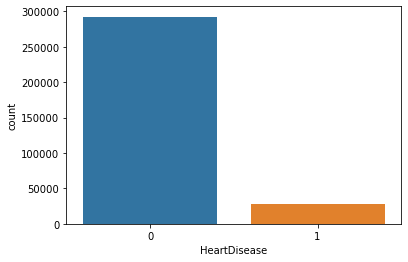

In [15]:
# Plot target values
sns.countplot(heart_df['HeartDisease'])

In [16]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = heart_df[(heart_df['HeartDisease']==0)] 
df_minority = heart_df[(heart_df['HeartDisease']==1)] 
# undersample majority class
df_majority_undersampled = resample(df_majority, 
                                 replace=True,    
                                 n_samples= 27373, # to match minority class
                                 random_state=42) 
# Combine minority class with undersampled majority
heart_df_undersampled = pd.concat([df_majority_undersampled, df_minority])

In [17]:
# print new undersampled df
print(heart_df_undersampled.shape)
heart_df_undersampled.head()

(54746, 54)


,HeartDisease,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
133490,0,0,0,7,0,1,0,1,1,0,...,1,1,0,0,0,1,0,0,0,0
160740,0,0,0,8,1,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
144281,0,21,0,6,1,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
283354,0,2,2,6,0,1,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
131213,0,0,0,6,0,1,1,0,1,0,...,1,1,0,0,0,0,0,1,0,0


In [18]:
# Check balance of our target values
heart_df_undersampled['HeartDisease'].value_counts()

0    27373
1    27373
Name: HeartDisease, dtype: int64

C:\Users\s-e-r\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

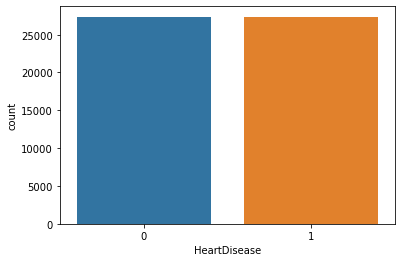

In [19]:
# Plot target values
sns.countplot(heart_df_undersampled['HeartDisease'])

### Split our data into training and testing

In [20]:
# Removing HeartDisease target from features data
y = heart_df_undersampled.loc[:,"HeartDisease"]
X = heart_df_undersampled.drop(columns="HeartDisease")

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [21]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(41059, 53)
(13687, 53)


### Create a Logistic Regression Mode

In [22]:
model = LogisticRegression(solver='lbfgs', max_iter=500000, random_state=1)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500000, random_state=1)

In [23]:
# Calculate the confusion matrix
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

In [24]:
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual True", "Actual False"],
    columns=["Predicted True", "Predicted False"])

In [25]:
# Calculate the Balanced Accuracy Score
from sklearn.metrics import balanced_accuracy_score
acc_score = balanced_accuracy_score(y_test, y_pred)

In [26]:
# Displaying results
print("Confusion Matrix")
display(cm_df)

# Calculated the balanced accuracy score
print("Accuracy Score: %.2f%%" % (acc_score * 100.0))

# Print the imbalanced classification report
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Confusion Matrix


,Predicted True,Predicted False
Actual True,5073,1770
Actual False,1468,5376


Accuracy Score: 76.34%
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      6843
           1       0.75      0.79      0.77      6844

    accuracy                           0.76     13687
   macro avg       0.76      0.76      0.76     13687
weighted avg       0.76      0.76      0.76     13687



In [27]:
# Export undersampled dataframe to CSV without index
heart_df_undersampled.to_csv('Resources/heart_undersampled.csv', index=False)

## Oversampling

In [28]:
#create two different dataframe of majority and minority class 
df_majority = heart_df[(heart_df['HeartDisease']==0)] 
df_minority = heart_df[(heart_df['HeartDisease']==1)] 
# Oversample minority class
df_minority_oversampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples= 292422, # to match majority class
                                 random_state=42) 
# Combine majority class with oversampled minority class
heart_df_oversampled = pd.concat([df_minority_oversampled, df_majority])

In [29]:
# Check balance of our target values
heart_df_oversampled['HeartDisease'].value_counts()

1    292422
0    292422
Name: HeartDisease, dtype: int64

In [30]:
# Removing HeartDisease target from features data
y = heart_df_oversampled.loc[:,"HeartDisease"]
X = heart_df_oversampled.drop(columns="HeartDisease")

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [31]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(438633, 53)
(146211, 53)


In [32]:
model = LogisticRegression(solver='lbfgs', max_iter=500000, random_state=1)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500000, random_state=1)

In [33]:
# Calculate the confusion matrix
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

In [34]:
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual True", "Actual False"],
    columns=["Predicted True", "Predicted False"])

In [35]:
# Calculate the Balanced Accuracy Score
from sklearn.metrics import balanced_accuracy_score
acc_score = balanced_accuracy_score(y_test, y_pred)
acc_score

0.765154355001303

In [36]:
# Displaying results
print("Confusion Matrix")
display(cm_df)

# Calculated the balanced accuracy score
print("Accuracy Score: %.2f%%" % (acc_score * 100.0))

# Print the imbalanced classification report
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Confusion Matrix


,Predicted True,Predicted False
Actual True,54723,18382
Actual False,15955,57151


Accuracy Score: 76.52%
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     73105
           1       0.76      0.78      0.77     73106

    accuracy                           0.77    146211
   macro avg       0.77      0.77      0.77    146211
weighted avg       0.77      0.77      0.77    146211

